## Stock price movements of sportswear companies during Olympic games

<p style="color:gray;"><i>Built in June, 2024.</i></p>

The upcoming 2024 Olympics present a significant opportunity for sportswear companies to showcase their brands on a global stage. Since the Olympics are a premier event for marketing and sponsorship, analyzing the historical performance of sportswear companies' stock prices during previous Olympic Games can provide valuable insights for investors. 

This analysis focuses on the volatility of the stock prices of major sportswear companies during the period surrounding past Olympics. The aim is to understand how these high-profile events impact market behavior and investor sentiment. This knowledge can be instrumental for making informed investment decisions as we approach the 2024 Olympics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates


In [2]:
nike_df = pd.read_csv('data/NKE.csv')
adidas_df = pd.read_csv('data/ADDYY.csv')
columbia_df = pd.read_csv('data/COLM.csv')
ua_df = pd.read_csv('data/UA.csv')
spy_df = pd.read_csv('data/SPY.csv')
dataframes = {
    'Nike': nike_df,
    'Adidas': adidas_df,
    'Columbia': columbia_df,
    'UA': ua_df,
    'SPY': spy_df,
}

#### Price action from 2021-03 to 2021-09, the period up to and through Tokyo Olympic Games

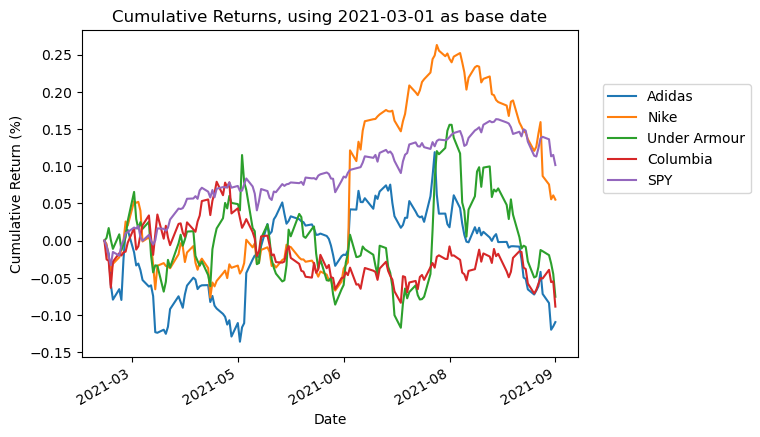

In [3]:
# building a dataframe with cumulative returns between 2021-03-01 and 2021-09-30 (using 2021-03-01 as base date)
df = pd.DataFrame({
    'Adidas': adidas_df.loc[(pd.to_datetime(adidas_df['date']) >= '2021-03-01') & (pd.to_datetime(adidas_df['date']) <= '2021-09-30'), 'price'] / adidas_df.loc[(pd.to_datetime(adidas_df['date']) == '2021-03-01'), 'price'].values[0] - 1,
    'Nike': nike_df.loc[(pd.to_datetime(nike_df['date']) >= '2021-03-01') & (pd.to_datetime(nike_df['date']) <= '2021-09-30'), 'price'] / nike_df.loc[(pd.to_datetime(nike_df['date']) == '2021-03-01'), 'price'].values[0] - 1,
    'Under Armour': ua_df.loc[(pd.to_datetime(ua_df['date']) >= '2021-03-01') & (pd.to_datetime(ua_df['date']) <= '2021-09-30'), 'price'] / ua_df.loc[(pd.to_datetime(ua_df['date']) == '2021-03-01'), 'price'].values[0] - 1,
    'Columbia': columbia_df.loc[(pd.to_datetime(columbia_df['date']) >= '2021-03-01') & (pd.to_datetime(columbia_df['date']) <= '2021-09-30'), 'price'] / columbia_df.loc[(pd.to_datetime(columbia_df['date']) == '2021-03-01'), 'price'].values[0] - 1,
    'SPY': spy_df.loc[(pd.to_datetime(spy_df['date']) >= '2021-03-01') & (pd.to_datetime(spy_df['date']) <= '2021-09-30'), 'price'] / spy_df.loc[(pd.to_datetime(spy_df['date']) == '2021-03-01'), 'price'].values[0] - 1,
    'Date': pd.to_datetime(spy_df.loc[(pd.to_datetime(spy_df['date']) >= '2021-03-01') & (pd.to_datetime(spy_df['date']) <= '2021-09-30'), 'date'])
})

df.plot(x='Date', y=['Adidas', 'Nike', 'Under Armour', 'Columbia', 'SPY'])
plt.title('Cumulative Returns, using 2021-03-01 as base date')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.legend(['Adidas', 'Nike', 'Under Armour', 'Columbia', 'SPY'], loc=(1.05, 0.5))

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()

#### Price action from 2020-01 to 2024-01, the wider period compared to the one above

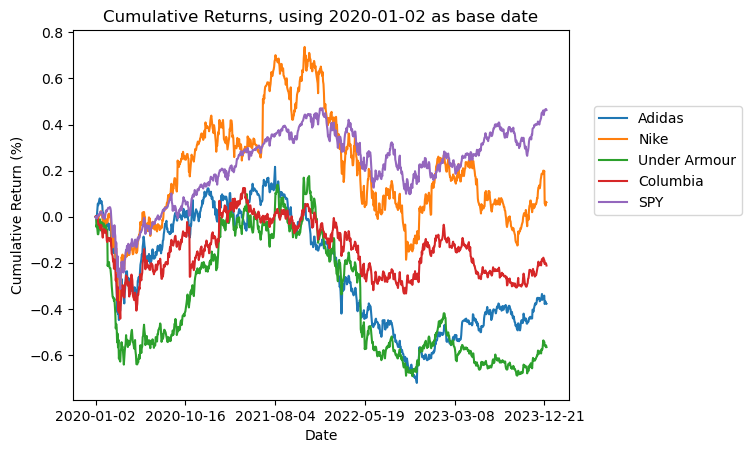

In [4]:
# building dataframe with cumulative returns (with 2020-01-02 as base date)
df = pd.DataFrame({
    'Adidas': adidas_df['price'] / adidas_df['price'].iloc[0] - 1,
    'Nike': nike_df['price'] / nike_df['price'].iloc[0] - 1,
    'Under Armour': ua_df['price'] / ua_df['price'].iloc[0] - 1,
    'Columbia': columbia_df['price'] / columbia_df['price'].iloc[0] - 1,
    'SPY': spy_df['price'] / spy_df['price'].iloc[0] - 1,
    'Date': spy_df['date']
})

df.plot(x='Date', y=['Adidas', 'Nike', 'Under Armour', 'Columbia', 'SPY'])
plt.title('Cumulative Returns, using 2020-01-02 as base date')
plt.ylabel('Cumulative Return (%)')
plt.legend(['Adidas', 'Nike', 'Under Armour', 'Columbia', 'SPY'], loc=(1.05, 0.5))
plt.show()

### Comparing the volatility of the two periods

In [5]:
print('Standard deviation of returns over the period 2021-03-01 to 2021-09-30')
for name, df in dataframes.items():
    print(f'{name} {df.loc[(pd.to_datetime(df['date']) >= "2021-03-01") & (pd.to_datetime(df['date']) <= "2021-09-30"), "changePercent"].std()}')

Standard deviation of returns over the period 2021-03-01 to 2021-09-30
Nike 1.0014714664100024
Adidas 0.784803368129447
Columbia 1.4347463227197896
UA 1.9490644129387784
SPY 0.5691030234873001


In [6]:
print('Standard deviation of returns over the period 2020-01 to 2024-01')
for name, df in dataframes.items():
    print(f'{name} {df['changePercent'].std()}')

Standard deviation of returns over the period 2020-01 to 2024-01
Nike 1.5501245560927879
Adidas 1.3853876308229682
Columbia 1.816483115405821
UA 2.6019546217218887
SPY 1.0004488078792122


The volatility of sportswear companies' stock price during Olympic period is lower, however that does not account for the volatility of the whole market. 

Instead of looking at individual volatility metrics, volatility should be standardized with respect to the whole market during the period in question.

In [7]:
# calculating volatility over olympic period with respect to the volatilty of the market
market_volatility = spy_df.loc[(pd.to_datetime(spy_df['date']) >= '2021-03-01') & (pd.to_datetime(spy_df['date']) <= '2021-09-30'), 'changePercent'].std()
standardized_volatility_during_olympics = {}
for name, df in dataframes.items():
    standardized_volatility_during_olympics[name] = df.loc[(pd.to_datetime(df['date']) >= "2021-03-01") & (pd.to_datetime(df['date']) <= "2021-09-30"), "changePercent"].std() / market_volatility

In [8]:
# calculating volatility over wider period with respect to the volatilty of the market
market_volatility = spy_df['changePercent'].std()
standardized_volatility = {}
for name, df in dataframes.items():
    standardized_volatility[name] = df['changePercent'].std() / market_volatility

In [9]:
print("Standardized volatility during Olympic period")
for name, value in standardized_volatility_during_olympics.items():
    print(f'{name} {value}')

print("\nStandardized volatility during 2020-01 to 2024-01")
for name, value in standardized_volatility.items():
    print(f'{name} {value}')

print("\nDifference in volatility between Olympic period and 2020-01 to 2024-01")
for name, value in standardized_volatility_during_olympics.items():
    print(f'{name} {value - standardized_volatility[name]}')

Standardized volatility during Olympic period
Nike 1.75973668225003
Adidas 1.3790180964430605
Columbia 2.521066069774284
UA 3.4248006643779023
SPY 1.0

Standardized volatility during 2020-01 to 2024-01
Nike 1.549429160077464
Adidas 1.3847661368698747
Columbia 1.8156682291985213
UA 2.600787367859038
SPY 1.0

Difference in volatility between Olympic period and 2020-01 to 2024-01
Nike 0.2103075221725661
Adidas -0.005748040426814205
Columbia 0.7053978405757626
UA 0.8240132965188645
SPY 0.0


The analysis indicates that nearly all the sportswear companies experienced increased volatility in their stock prices during the Tokyo Olympics and the preceding period, with the exception of Adidas, whose volatility shrinked negligibly.

It must be stated that the sample size is far too small to draw any definitive conclusions. To further enhance the analysis, we could examine the behavior of stock prices during other Olympic Games, such as the 2016 Rio Olympics or the 2012 London Olympics. Additionally, we could also analyze their stock price action during the Winter Olympics.

Investors could use option strategies like straddles or strangles to gain advantage and profit from increased volatility. 